# Dataset Loading and Preprocessing

## Introduction
This notebook serves as the foundation for our research. Here, we handle the downloading, loading, and initial inspection of standard graph datasets (Cora, PubMed).

**Objectives:**
1.  Load datasets using the `DatasetLoader` utility.
2.  Inspect the PyTorch Geometric `Data` object structure.
3.  Compute baseline graph statistics (degree distribution, density) to understand the initial connectivity before any sparsification is applied.

In [1]:
import sys
import torch
import numpy as np
from collections import Counter
from pathlib import Path

sys.path.insert(0, str(Path.cwd().parent.parent))
from src import DatasetLoader, set_global_seed

/Users/ilias/Documents/GitHub/gnn-sparsification-research/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Setup and Device Detection

Set a global seed for reproducibility and detect the best available device.

In [2]:
set_global_seed(42)

if torch.cuda.is_available():
    DEVICE = "cuda"
elif torch.backends.mps.is_available():
    DEVICE = "mps"
else:
    DEVICE = "cpu"

print(f"Using device: {DEVICE}")

Using device: mps


## 2. Loading Datasets

The `DatasetLoader` class provides a unified interface to load different graph datasets.

In [3]:
loader = DatasetLoader(root="../data")

### 2.1 Cora Dataset

Cora is a citation network with 2,708 nodes (papers) and 10,556 edges (citations).
Each paper has a 1,433-dimensional bag-of-words feature vector and belongs to one of 7 classes.

In [4]:
cora_data, cora_features, cora_classes = loader.get_dataset("cora", DEVICE)

print("=" * 50)
print("CORA DATASET")
print("=" * 50)
print(f"Nodes:         {cora_data.num_nodes:,}")
print(f"Edges:         {cora_data.edge_index.shape[1]:,}")
print(f"Features:      {cora_features}")
print(f"Classes:       {cora_classes}")
print(f"Train nodes:   {cora_data.train_mask.sum().item():,}")
print(f"Val nodes:     {cora_data.val_mask.sum().item():,}")
print(f"Test nodes:    {cora_data.test_mask.sum().item():,}")

CORA DATASET
Nodes:         2,708
Edges:         10,556
Features:      1433
Classes:       7
Train nodes:   140
Val nodes:     500
Test nodes:    1,000


### 2.2 PubMed Dataset

PubMed is a larger citation network with ~20k nodes and ~88k edges.

In [5]:
pubmed_data, pubmed_features, pubmed_classes = loader.get_dataset("pubmed", DEVICE)

print("=" * 50)
print("PUBMED DATASET")
print("=" * 50)
print(f"Nodes:         {pubmed_data.num_nodes:,}")
print(f"Edges:         {pubmed_data.edge_index.shape[1]:,}")
print(f"Features:      {pubmed_features}")
print(f"Classes:       {pubmed_classes}")
print(f"Train nodes:   {pubmed_data.train_mask.sum().item():,}")
print(f"Val nodes:     {pubmed_data.val_mask.sum().item():,}")
print(f"Test nodes:    {pubmed_data.test_mask.sum().item():,}")

PUBMED DATASET
Nodes:         19,717
Edges:         88,648
Features:      500
Classes:       3
Train nodes:   60
Val nodes:     500
Test nodes:    1,000


### 2.3 Flickr Dataset

Flickr is a dataset of images where nodes are images and edges represent shared properties (e.g. same location, same gallery, etc.).


In [6]:
flickr_data, flickr_features, flickr_classes = loader.get_dataset("flickr", DEVICE)

print("=" * 50)
print("FLICKR DATASET")
print("=" * 50)
print(f"Nodes:         {flickr_data.num_nodes:,}")
print(f"Edges:         {flickr_data.edge_index.shape[1]:,}")
print(f"Features:      {flickr_features}")
print(f"Classes:       {flickr_classes}")
print(f"Train nodes:   {flickr_data.train_mask.sum().item():,}")
print(f"Val nodes:     {flickr_data.val_mask.sum().item():,}")
print(f"Test nodes:    {flickr_data.test_mask.sum().item():,}")


FLICKR DATASET
Nodes:         89,250
Edges:         899,756
Features:      500
Classes:       7
Train nodes:   44,625
Val nodes:     22,312
Test nodes:    22,313


## 3. Understanding Graph Data Structure

(Retrospective) We have loaded the datasets and seen their high-level statistics (nodes, edges, classes).

(Prospective) Now we will inspect the internal structure of the PyG `Data` object to understand how these features and connections are stored. PyTorch Geometric uses a `Data` object to represent graphs.

In [7]:
print("Cora Data object attributes:")
print(f"  x           : Node features, shape {tuple(cora_data.x.shape)}")
print(f"  edge_index  : Edge list (COO format), shape {tuple(cora_data.edge_index.shape)}")
print(f"  y           : Node labels, shape {tuple(cora_data.y.shape)}")
print(f"  train_mask  : Boolean mask for training nodes")
print(f"  val_mask    : Boolean mask for validation nodes")
print(f"  test_mask   : Boolean mask for test nodes")


Cora Data object attributes:
  x           : Node features, shape (2708, 1433)
  edge_index  : Edge list (COO format), shape (2, 10556)
  y           : Node labels, shape (2708,)
  train_mask  : Boolean mask for training nodes
  val_mask    : Boolean mask for validation nodes
  test_mask   : Boolean mask for test nodes


In [8]:
print("PubMed Data object attributes:")
print(f"  x           : Node features, shape {tuple(pubmed_data.x.shape)}")
print(f"  edge_index  : Edge list (COO format), shape {tuple(pubmed_data.edge_index.shape)}")
print(f"  y           : Node labels, shape {tuple(pubmed_data.y.shape)}")
print(f"  train_mask  : Boolean mask for training nodes")
print(f"  val_mask    : Boolean mask for validation nodes")
print(f"  test_mask   : Boolean mask for test nodes")


PubMed Data object attributes:
  x           : Node features, shape (19717, 500)
  edge_index  : Edge list (COO format), shape (2, 88648)
  y           : Node labels, shape (19717,)
  train_mask  : Boolean mask for training nodes
  val_mask    : Boolean mask for validation nodes
  test_mask   : Boolean mask for test nodes


In [9]:
print("Flickr Data object attributes:")
print(f"  x           : Node features, shape {tuple(flickr_data.x.shape)}")
print(f"  edge_index  : Edge list (COO format), shape {tuple(flickr_data.edge_index.shape)}")
print(f"  y           : Node labels, shape {tuple(flickr_data.y.shape)}")
print(f"  train_mask  : Boolean mask for training nodes")
print(f"  val_mask    : Boolean mask for validation nodes")
print(f"  test_mask   : Boolean mask for test nodes")


Flickr Data object attributes:
  x           : Node features, shape (89250, 500)
  edge_index  : Edge list (COO format), shape (2, 899756)
  y           : Node labels, shape (89250,)
  train_mask  : Boolean mask for training nodes
  val_mask    : Boolean mask for validation nodes
  test_mask   : Boolean mask for test nodes


### 4. Graph Connectivity Analysis

**(Retrospective)** We have validated the data object dimensions: `x` has shape (2708, 1433) and the `edge_index` is in standard COO format (2, 10556).

**(Prospective)** To better understand the graph's topology, we will now compute fundamental degree statistics (min, max, average). This baseline density is crucial for later evaluating how much information is lost when we apply sparsification algorithms.

In [10]:
def compute_graph_stats(data):
    """Compute basic graph statistics."""
    edge_index = data.edge_index.cpu().numpy()
    degrees = Counter(edge_index[0])
    degree_values = list(degrees.values())

    return {
        "num_nodes": data.num_nodes,
        "num_edges": edge_index.shape[1],
        "avg_degree": np.mean(degree_values),
        "median_degree": np.median(degree_values),
        "max_degree": max(degree_values),
        "min_degree": min(degree_values),
        "range_degree": max(degree_values) - min(degree_values),
        "mode_degree": Counter(degree_values).most_common(1)[0][0],
        "variance_degree": np.var(degree_values),
        "std_degree": np.std(degree_values),
        "quartiles_degree_25": np.percentile(degree_values, 25),
        "quartiles_degree_50": np.percentile(degree_values, 50),
        "quartiles_degree_75": np.percentile(degree_values, 75),
        "density": edge_index.shape[1] / (data.num_nodes * (data.num_nodes - 1)),
    }


cora_stats = compute_graph_stats(cora_data)
print("Cora Graph Statistics:")
for key, value in cora_stats.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value:,}")

print("\n" + "="*30 + "\n")

pubmed_stats = compute_graph_stats(pubmed_data)
print("PubMed Graph Statistics:")
for key, value in pubmed_stats.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value:,}")

print("\n" + "="*30 + "\n")

flickr_stats = compute_graph_stats(flickr_data)
print("Flickr Graph Statistics:")
for key, value in flickr_stats.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value:,}")


Cora Graph Statistics:
  num_nodes: 2,708
  num_edges: 10,556
  avg_degree: 3.8981
  median_degree: 3.0000
  max_degree: 168
  min_degree: 1
  range_degree: 167
  mode_degree: 2
  variance_degree: 27.3301
  std_degree: 5.2278
  quartiles_degree_25: 2.0000
  quartiles_degree_50: 3.0000
  quartiles_degree_75: 5.0000
  density: 0.0014


PubMed Graph Statistics:
  num_nodes: 19,717
  num_edges: 88,648
  avg_degree: 4.4960
  median_degree: 2.0000
  max_degree: 171
  min_degree: 1
  range_degree: 170
  mode_degree: 1
  variance_degree: 55.2198
  std_degree: 7.4310
  quartiles_degree_25: 1.0000
  quartiles_degree_50: 2.0000
  quartiles_degree_75: 4.0000
  density: 0.0002


Flickr Graph Statistics:
  num_nodes: 89,250
  num_edges: 899,756
  avg_degree: 10.0813
  median_degree: 6.0000
  max_degree: 5,425
  min_degree: 1
  range_degree: 5,424
  mode_degree: 5
  variance_degree: 1007.9858
  std_degree: 31.7488
  quartiles_degree_25: 5.0000
  quartiles_degree_50: 6.0000
  quartiles_degree_75: 9.00

## 5. Class Distribution

Visualize the class distribution in the datasets.


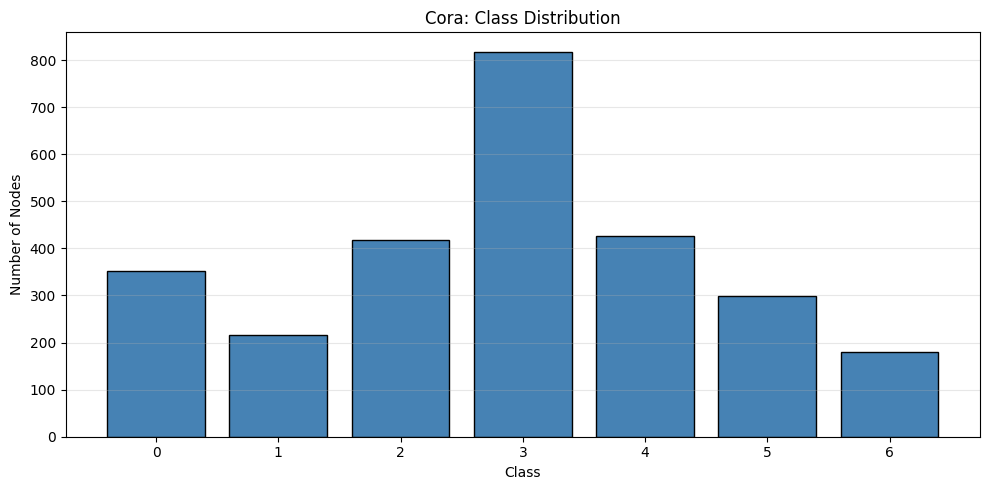

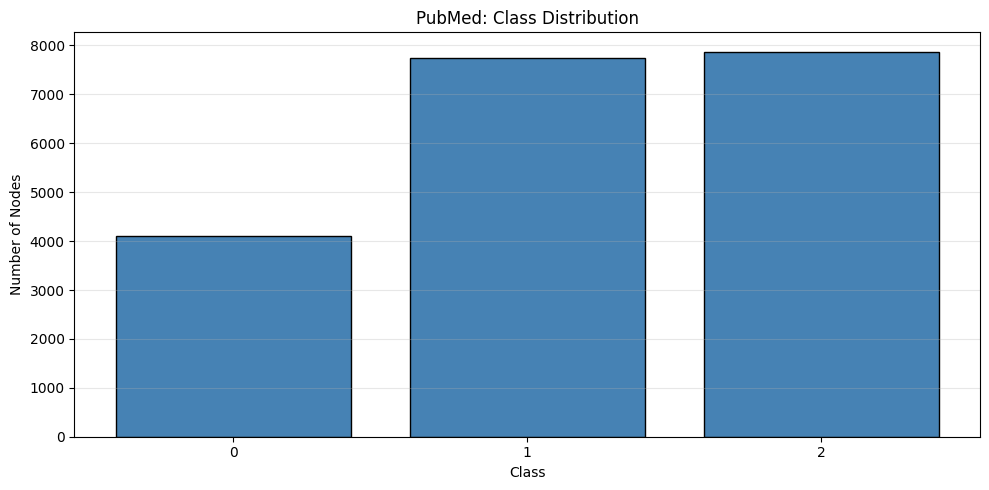

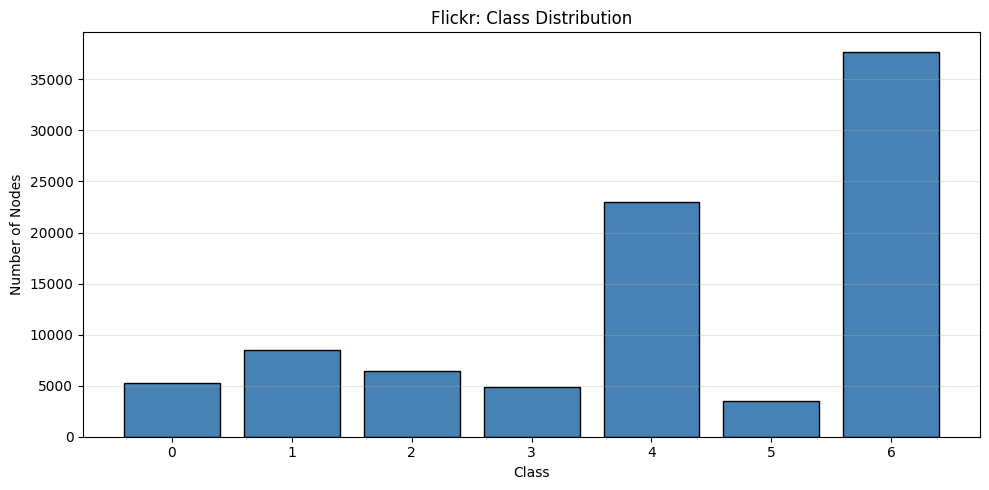

In [11]:
import matplotlib.pyplot as plt

def plot_class_distribution(data, title):
    labels = data.y.cpu().numpy()
    unique, counts = np.unique(labels, return_counts=True)

    plt.figure(figsize=(10, 5))
    plt.bar(unique, counts, color="steelblue", edgecolor="black")
    plt.xlabel("Class")
    plt.ylabel("Number of Nodes")
    plt.title(f"{title}: Class Distribution")
    plt.xticks(unique)
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_class_distribution(cora_data, "Cora")
plot_class_distribution(pubmed_data, "PubMed")
plot_class_distribution(flickr_data, "Flickr")


## 6. Node Classification Properties

Since we are focusing on **Node Classification**, I should look at some properties that specifically affect this task.

1.  **Homophily**: Do nodes connect to other nodes with the same label? (High homophily makes classification easier).
2.  **Label Rate**: How many nodes do we actually have for training?
3.  **Split Integrity**: Are the train/val/test sets actually separate? (Sanity check).
4.  **Feature Sparsity**: How sparse are the input features?


In [12]:
def edge_homophily(data):
    """
    Calculates the fraction of edges connecting nodes with the same class label.
    """
    src, dst = data.edge_index
    y = data.y
    # Check if source and target have same label
    matches = (y[src] == y[dst]).sum().item()
    # Normalize by total number of edges
    return matches / data.edge_index.shape[1]

print(f"Cora Homophily:   {edge_homophily(cora_data):.4f}")
print(f"PubMed Homophily: {edge_homophily(pubmed_data):.4f}")
print(f"Flickr Homophily: {edge_homophily(flickr_data):.4f}")


Cora Homophily:   0.8100
PubMed Homophily: 0.8024
Flickr Homophily: 0.3195


### 6.2 Training Splits & Integrity Check

It's important to verify that our training data is balanced (or not) and that there is no "data leakage" between our splits.


In [13]:
def check_splits(data, name):
    num_nodes = data.num_nodes
    train_mask = data.train_mask
    val_mask = data.val_mask
    test_mask = data.test_mask

    # Calculate Label Rate (fraction of nodes used for training)
    label_rate = train_mask.sum().item() / num_nodes
    
    print(f"--- {name} ---")
    print(f"Label Rate: {label_rate:.2%}")
    
    # Check for overlaps (Data Leakage)
    # If a node is in both Train and Test, that's cheating!
    overlap = (train_mask & val_mask).any() or \
              (train_mask & test_mask).any() or \
              (val_mask & test_mask).any()

    if overlap:
        print(f"  WARNING: Splits overlap detected!")
    else:
        print(f"  Splits are disjoint (Good).")

check_splits(cora_data, "Cora")
check_splits(pubmed_data, "PubMed")
check_splits(flickr_data, "Flickr")


--- Cora ---
Label Rate: 5.17%
  Splits are disjoint (Good).
--- PubMed ---
Label Rate: 0.30%
  Splits are disjoint (Good).
--- Flickr ---
Label Rate: 50.00%
  Splits are disjoint (Good).


### 6.3 Feature Sparsity

Cora and PubMed are citation networks using "Bag of Words" features, so I expect them to be very sparse (mostly zeros). Flickr uses image features, which might be dense.


In [14]:
def feature_sparsity(data):
    """Calculates the percentage of zero elements in the feature matrix."""
    num_elements = data.x.numel()
    num_zeros = (data.x == 0).sum().item()
    return num_zeros / num_elements

print(f"Cora Feature Sparsity:   {feature_sparsity(cora_data):.2%}")
print(f"PubMed Feature Sparsity: {feature_sparsity(pubmed_data):.2%}")
print(f"Flickr Feature Sparsity: {feature_sparsity(flickr_data):.2%}")


Cora Feature Sparsity:   98.73%
PubMed Feature Sparsity: 89.98%
Flickr Feature Sparsity: 53.61%


## 7. Summary

In this notebook, we covered:
- Loading datasets with `DatasetLoader`
- Understanding PyG's `Data` object structure
- Computing basic graph statistics
- Visualizing class distributions
- Analyzing specific node classification properties (Homophily, Splits, Sparsity)

**Next:** In notebook 02, we'll implement and visualize sparsification algorithms.
